# AIRQUALITY DATASET

**Calidad del aire**

El dataset presenta 6 columnas y 153 registros, las columnas son:
- Ozone: ozono
- Solar.R: rayos UV
- Wind: viento
- Temp: temperatura
- Month: mes
- Day: día

## Análisis descriptivo

In [106]:
import pandas as pd
import numpy as np

%matplotlib inline

In [107]:
dfair = pd.read_csv('Data/airquality.csv')

In [108]:
dfair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [109]:
dfair.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [110]:
dfair.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [111]:
dfair.isnull().mean()*100

Ozone      24.183007
Solar.R     4.575163
Wind        0.000000
Temp        0.000000
Month       0.000000
Day         0.000000
dtype: float64

In [112]:
dfair.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


## Resumen inspección inicial

El muestra el dataset de la calidad del aire desde el 1 de mayo hasta el 30 de septiembre del año 1976. Presenta 6 columnas y 153 registros, las columnas son:

- Ozone: Ozono (decimal, desde 1 hasta 63)
- Solar.R: Rayos UV (decimal, desde 7 hasta 334)
- Wind: viento (decimal, desde 1.7 hasta 20.7)
- Temp: temperatura (entero, desde 56 hasta 97)
- Month: mes (entero, desde 5 hasta el 9)
- Day: día (entero, desde 1 hasta el 31)

Presenta datos nulos en 2 columnas:

- Ozone: 37 (24%)
- Solar.R: 7 (4%)

## Convertir el indice a fecha

Juntar el 'Year', 'Month', 'Day'.

In [113]:
dfair['Year'] = '1976'

dfair['Date'] = dfair['Year'] + '-' + dfair['Month'].astype(str) \
+ '-' + dfair['Day'].astype(str)

#PEP8: 72 caracteres máximo vscode

Convertirlo a formato datetime y establecer el index

In [114]:
dfair['Date'] = pd.to_datetime(dfair['Date'], yearfirst=True)
dfair.index = dfair['Date']

In [115]:
dfair.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1976-05-01 to 1976-09-30
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Ozone    116 non-null    float64       
 1   Solar.R  146 non-null    float64       
 2   Wind     153 non-null    float64       
 3   Temp     153 non-null    int64         
 4   Month    153 non-null    int64         
 5   Day      153 non-null    int64         
 6   Year     153 non-null    object        
 7   Date     153 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 10.8+ KB


Eliminar campos 'Year', 'Date', 'Month' y 'Day'.

In [116]:
del dfair['Year']
del dfair['Date']

dfair.drop(['Month', 'Day'], axis=1, inplace=True)

## Agregar variable 'num_no_nulos'

In [117]:
num_colums = len(dfair.columns)
dfair['num_no_nulos'] = num_colums - dfair.isnull().sum(axis=1)

In [118]:
dfair['num_no_nulos'].min()

2

In [119]:
del dfair['num_no_nulos']

## Explorar el dataset con visualización (missingno)

In [120]:
# !pip install missingno
# !python -m pip install missingno

In [121]:
import missingno as msno

<AxesSubplot:>

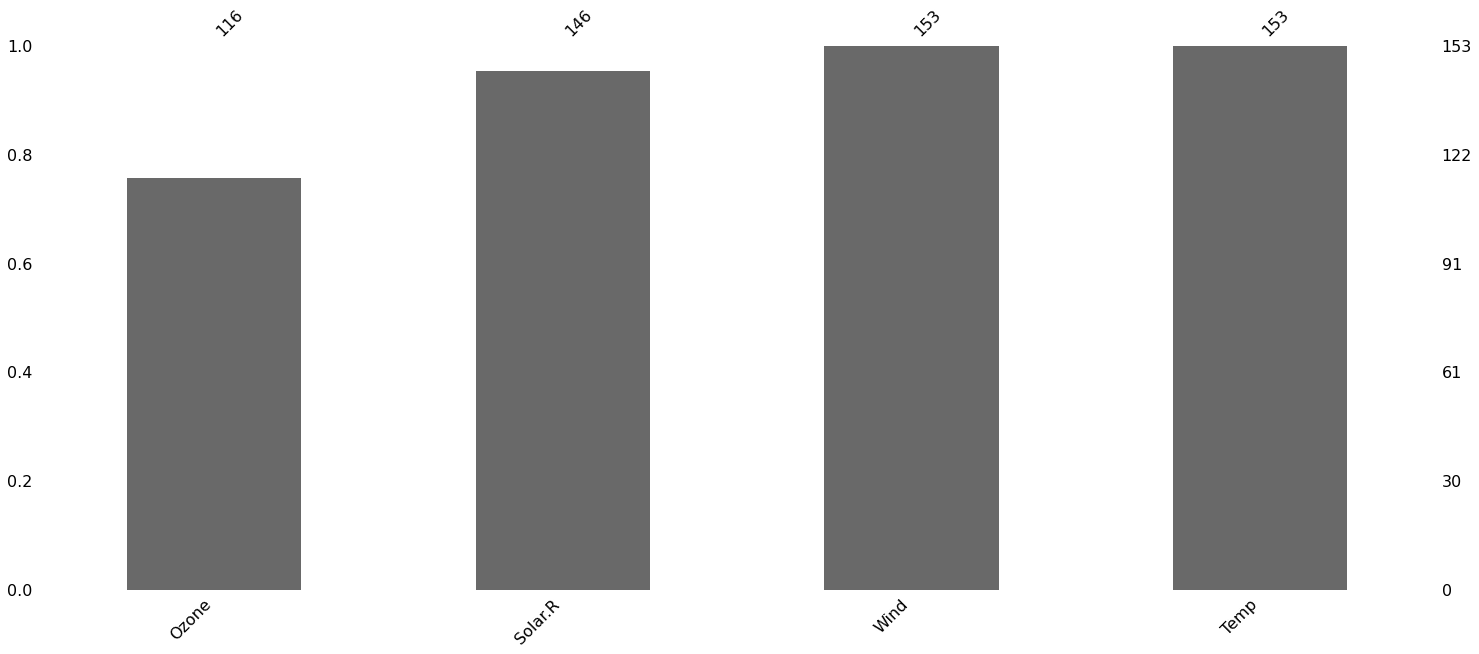

In [122]:
msno.bar(dfair)

Los registros impresos segùn el dataset

<AxesSubplot:>

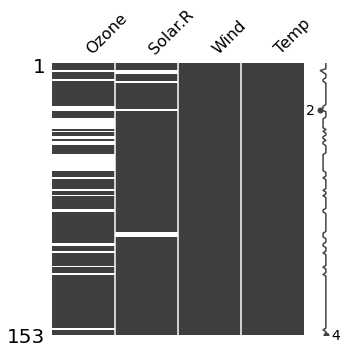

In [123]:
msno.matrix(dfair, figsize=(5,5))

In [124]:
dfair.sort_values(by='Ozone')

,Ozone,Solar.R,Wind,Temp
Date,,,,
1976-05-21,1.0,8.0,9.7,59
1976-05-23,4.0,25.0,9.7,61
1976-05-18,6.0,78.0,18.4,57
1976-09-24,7.0,49.0,10.3,69
1976-07-15,7.0,48.0,14.3,80
...,...,...,...,...
1976-08-11,NaN,137.0,11.5,86
1976-08-15,NaN,64.0,11.5,79
1976-08-23,NaN,255.0,12.6,75


<AxesSubplot:>

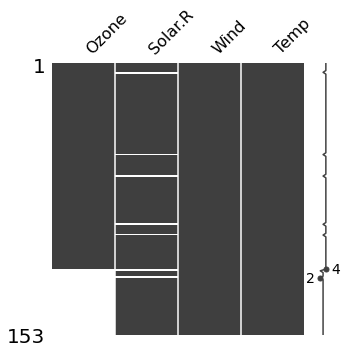

In [125]:
dfaux = dfair.sort_values(by='Ozone')
# dfaux = dfair.sort_values(by='Solar.R')

msno.matrix(dfaux, figsize=(5,5))

<AxesSubplot:>

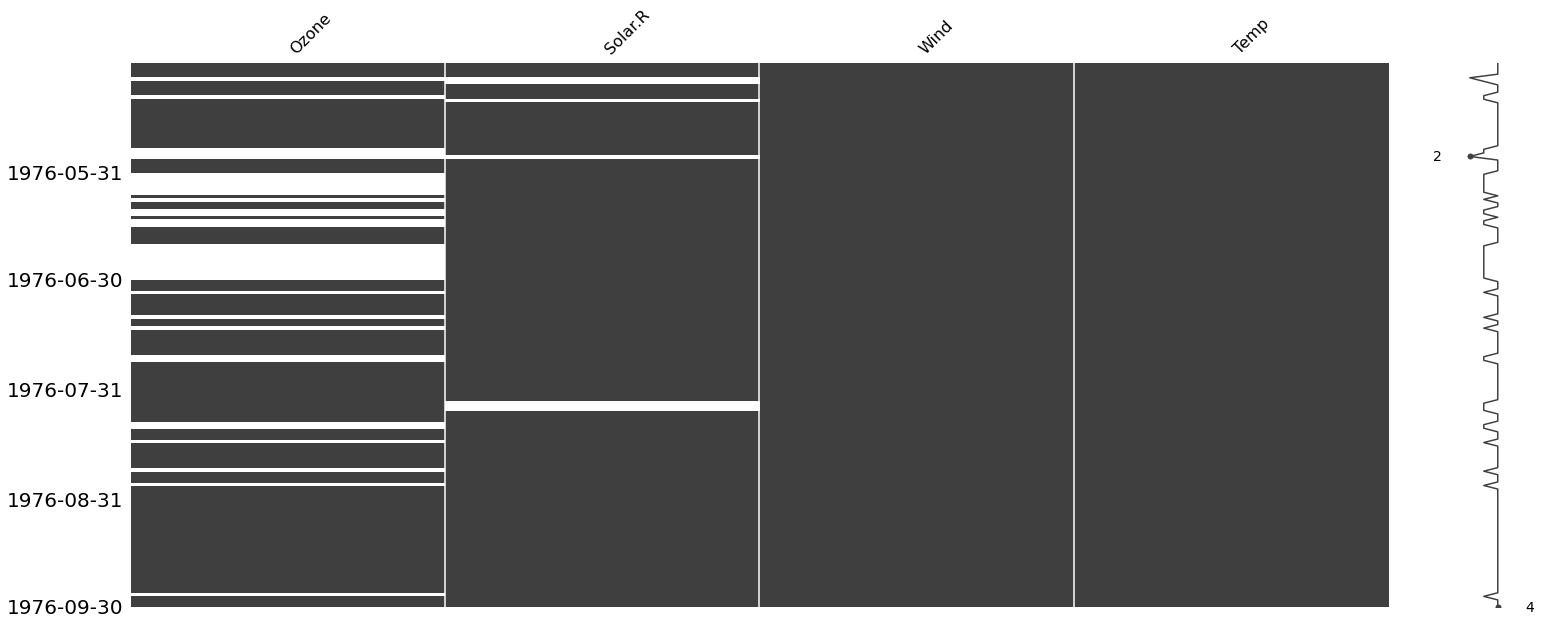

In [126]:
msno.matrix(dfair, freq='M')

¿Qué inputación podemos aplicar?
- Una regresión porque los valores pueden variar por la estacionalidad.
- Imputación de promedio por estacionalidad
- Buscar en google (Base de datos abiertos)

Estacionalidad: Los datos varía de acuerdo a cada estación (mensual), temporadas de mayor demanda.

<AxesSubplot:>

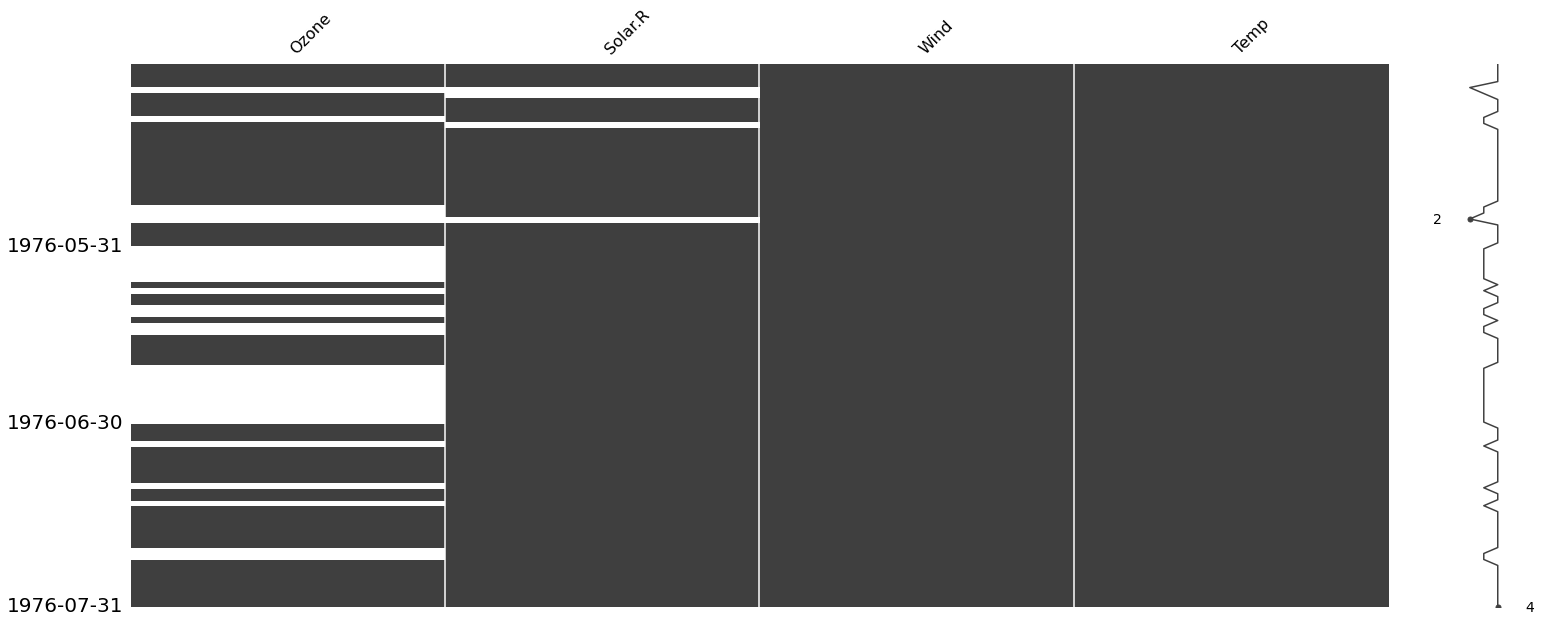

In [127]:
msno.matrix(dfair.loc['1976':'07-1976'], freq='M')

## Inputación de Ozono según estacionalidad

In [128]:
dfair['Ozone'].mean()

42.12931034482759

Agregar una columna con el promedio de Ozone por temporada (mes)

In [129]:
dfair_tmp = dfair.reset_index(drop=False)

In [130]:
dfair_tmp['month'] = dfair_tmp['Date'].dt.month

In [131]:
dfair_tmp.head()

,Date,Ozone,Solar.R,Wind,Temp,month
0,1976-05-01,41.0,190.0,7.4,67,5
1,1976-05-02,36.0,118.0,8.0,72,5
2,1976-05-03,12.0,149.0,12.6,74,5
3,1976-05-04,18.0,313.0,11.5,62,5
4,1976-05-05,NaN,NaN,14.3,56,5


In [132]:
dfozonemonth = dfair_tmp.groupby('month').agg({'Ozone':'mean'})

In [133]:
dfair_tmp = dfair_tmp.join(dfozonemonth, on='month', rsuffix='month')

In [134]:
dfair_tmp.head()

,Date,Ozone,Solar.R,Wind,Temp,month,Ozonemonth
0,1976-05-01,41.0,190.0,7.4,67,5,23.615385
1,1976-05-02,36.0,118.0,8.0,72,5,23.615385
2,1976-05-03,12.0,149.0,12.6,74,5,23.615385
3,1976-05-04,18.0,313.0,11.5,62,5,23.615385
4,1976-05-05,NaN,NaN,14.3,56,5,23.615385


Imputacion de NaN en la variable 'ozono' por la media de la estacionalidad.

In [135]:
dfair_tmp['Ozone'] = np.where(pd.isna(dfair_tmp['Ozone']), dfair_tmp['Ozonemonth'], dfair_tmp['Ozone'])
dfair_tmp.head()

,Date,Ozone,Solar.R,Wind,Temp,month,Ozonemonth
0,1976-05-01,41.000000,190.0,7.4,67,5,23.615385
1,1976-05-02,36.000000,118.0,8.0,72,5,23.615385
2,1976-05-03,12.000000,149.0,12.6,74,5,23.615385
3,1976-05-04,18.000000,313.0,11.5,62,5,23.615385
4,1976-05-05,23.615385,NaN,14.3,56,5,23.615385


In [139]:
dfair_tmp['Ozone'].index = dfair_tmp['Date']

In [142]:
dfair['Ozone'] = dfair_tmp['Ozone']

In [144]:
dfair.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1976-05-01 to 1976-09-30
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.0 KB


In [146]:
dfair.describe()

,Ozone,Solar.R,Wind,Temp
count,153.000000,146.000000,153.000000,153.000000
mean,40.851262,185.931507,9.957516,77.882353
std,29.595147,90.058422,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,21.000000,115.750000,7.400000,72.000000
50%,29.444444,205.000000,9.700000,79.000000
75%,59.115385,258.750000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


## Resumen análisis

El muestra el dataset de la calidad del aire desde el 1 de mayo hasta el 30 de septiembre del año 1976. Presenta 5 columnas y 153 registros, las columnas son:

- **index**: Fecha (Date)
- Ozono (decimal, desde 1 hasta 168)
- Solar.R: Rayos UV (decimal, desde 7 hasta 334)
- Wind: viento (decimal, desde 1.7 hasta 20.7)
- Temp: temperatura (entero, desde 56 hasta 97)

Presenta datos nulos en 1 columna(s):

- Solar.R: 7 (4%)

Se realizó las modificaciones al dataset:

- Establecer la fecha como indice
- Imputado de datos de la variable Ozono por estacionalidad (mes)

Análisis y preguntas para el negocio:

- En el mes de junio hay mayor cantidad de datos perdidos.
- La cantidad de Ozone aumentò excesivamente en Junio.